# 피쳐맵 시각화


In [69]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from keras import models
import matplotlib.pyplot as plt

In [11]:
model_path = '/content/drive/MyDrive/cats_and_dogs_small_cnn.h5'
img_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [12]:
model = load_model(model_path)

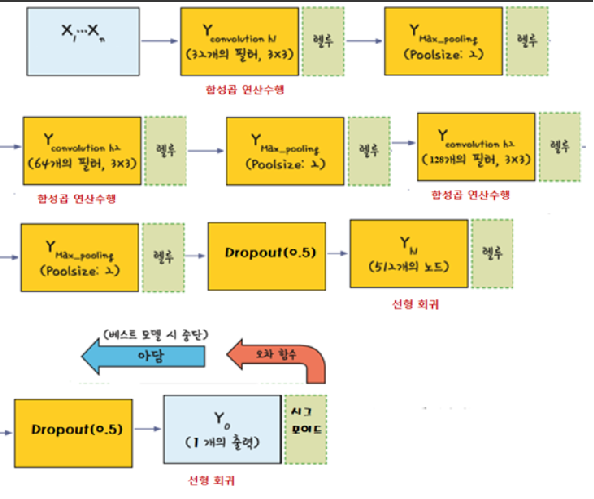

In [20]:
# 이미지 로드
img = image.load_img(img_path, target_size=(220,220))

# 3차원으로 변환
img_tensor = image.img_to_array(img)
print(img_tensor.shape)

# 4차원으로 변환
img_tensor = img_tensor.reshape(1, 220, 220, 3)
print(img_tensor.shape)

# 범위 수정
img_tensor = img_tensor/255

(220, 220, 3)
(1, 220, 220, 3)


In [21]:
model.predict(img_tensor)

array([[0.30759504]], dtype=float32)

In [23]:
model.layers[0].output

<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>

In [30]:
# 모델의 필터, 맥스풀링 객체 저장할 리스트
layer_outputs = []
for i in range(6):
  layer = model.layers[i]
  print("layer =", layer)
  print("layer.output =", layer.output)
  layer_outputs.append(layer.output)
  print("=" * 100)

layer = <keras.layers.convolutional.Conv2D object at 0x7f37f778e550>
layer.output = KerasTensor(type_spec=TensorSpec(shape=(None, 220, 220, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
layer = <keras.layers.pooling.MaxPooling2D object at 0x7f37f7792a10>
layer.output = KerasTensor(type_spec=TensorSpec(shape=(None, 110, 110, 32), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
layer = <keras.layers.convolutional.Conv2D object at 0x7f37f7796b90>
layer.output = KerasTensor(type_spec=TensorSpec(shape=(None, 110, 110, 64), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
layer = <keras.layers.pooling.MaxPooling2D object at 0x7f37f9019f50>
layer.output = KerasTensor(type_spec=TensorSpec(shape=(None, 55, 55, 64), dtype=tf.float32, name=None), name='max_pooling2d_1/MaxPool:0', description="created by layer 'max_pooling2d_1'")
layer = 

In [31]:
layer_outputs

[<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 55, 55, 128) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'max_pooling2d_2')>]

In [41]:
activation_model = models.Model(
    # 이미지를 필터 연산가능하게 준비
    inputs = model.input,

    # 필터
    outputs = layer_outputs
)
activation_model

In [53]:
activations = activation_model.predict(img_tensor)
activations[5].shape

(1, 28, 28, 128)

In [62]:
# 각 단계별 연산 결과 확인
for i in range(len(activations)):
  print("모델 layer 계산 {}층 , {} :".format(i ,layer_outputs))
  print("img_tensor 연산 결과 :")
  print("activations[{}].shape ={} ".format(i, activations[i].shape))
  print("="*100)

모델 layer 계산 0층 , [<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 55, 55, 128) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'max_pooling2d_2')>] :
img_tensor 연산 결과 :
activations[0].shape =(1, 220, 220, 32) 
모델 layer 계산 1층 , [<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTenso

In [65]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 220, 220, 32)

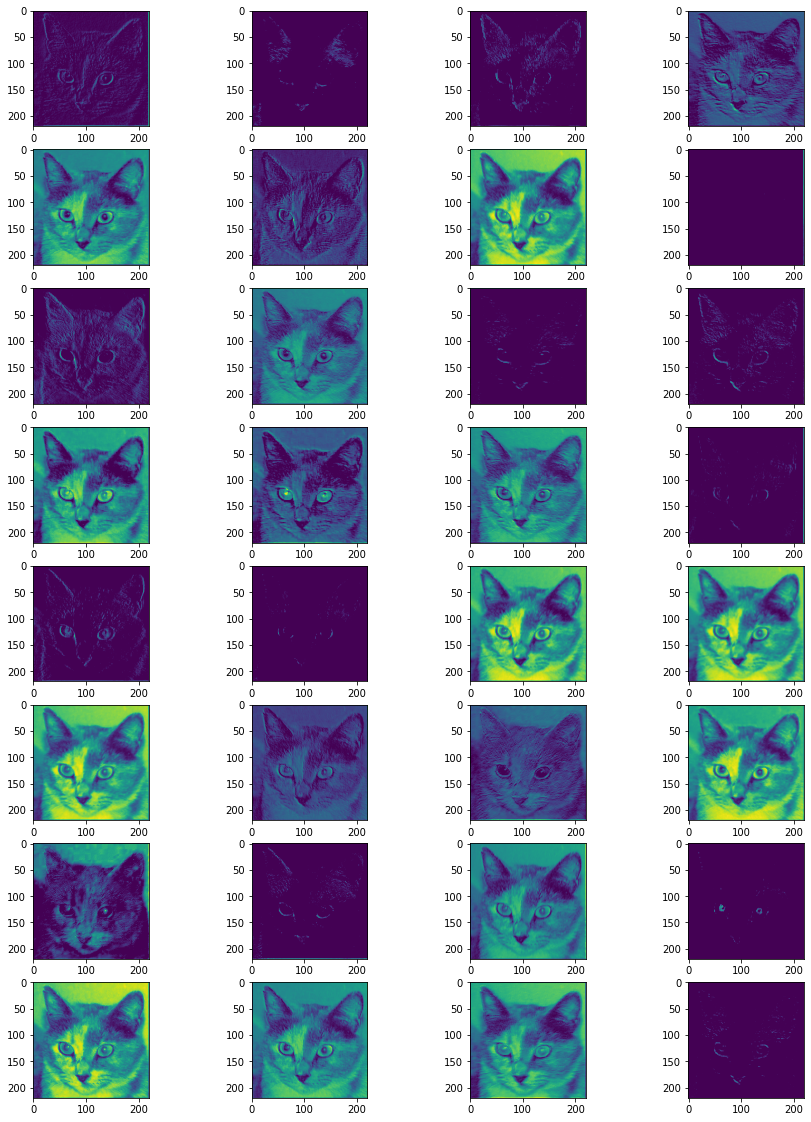

In [71]:
fig = plt.figure(figsize = (15, 20))

# 첫번째 연산 필터 결과
i = 0
for i in range(32):
  subplot = fig.add_subplot(8, 4, i+1)
  subplot = plt.imshow(first_layer_activation[0, :, :, i])

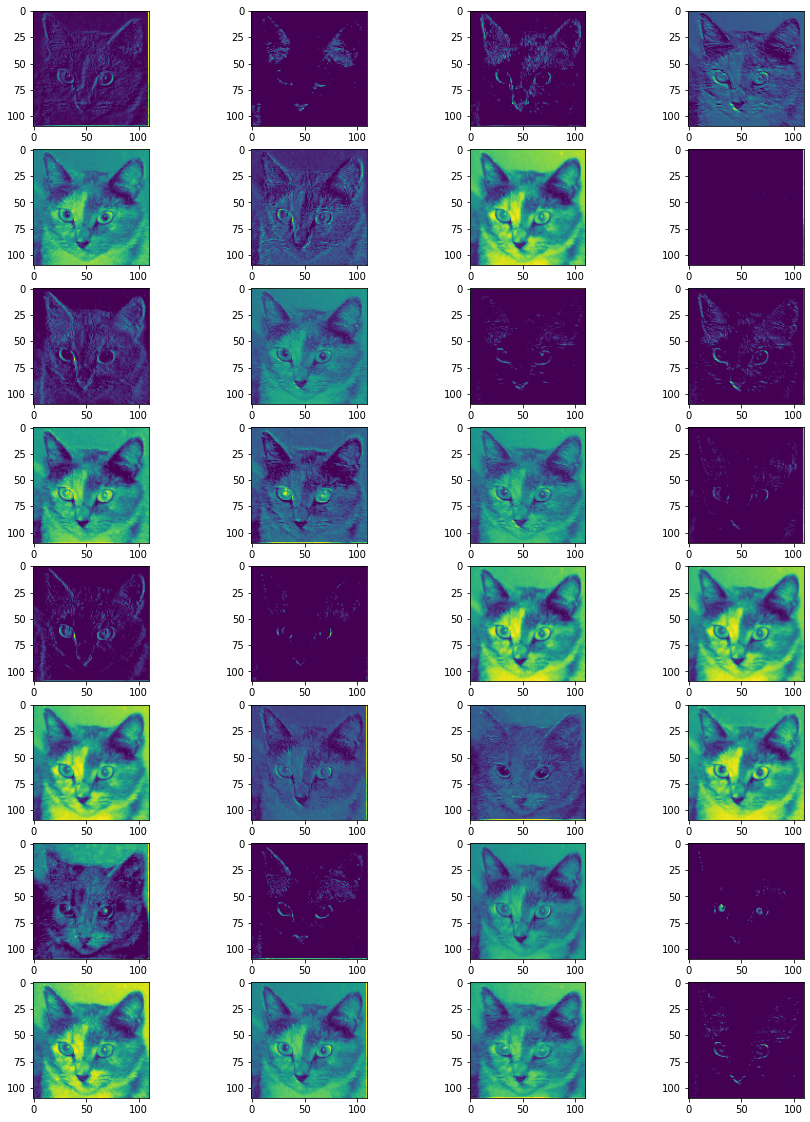

In [72]:
# 맥스 풀링 층
layer_out = activations[1]

fig = plt.figure(figsize = (15, 20))

# 첫번째 연산 필터 결과
i = 0
for i in range(32):
  subplot = fig.add_subplot(8, 4, i+1)
  subplot = plt.imshow(layer_out[0, :, :, i])

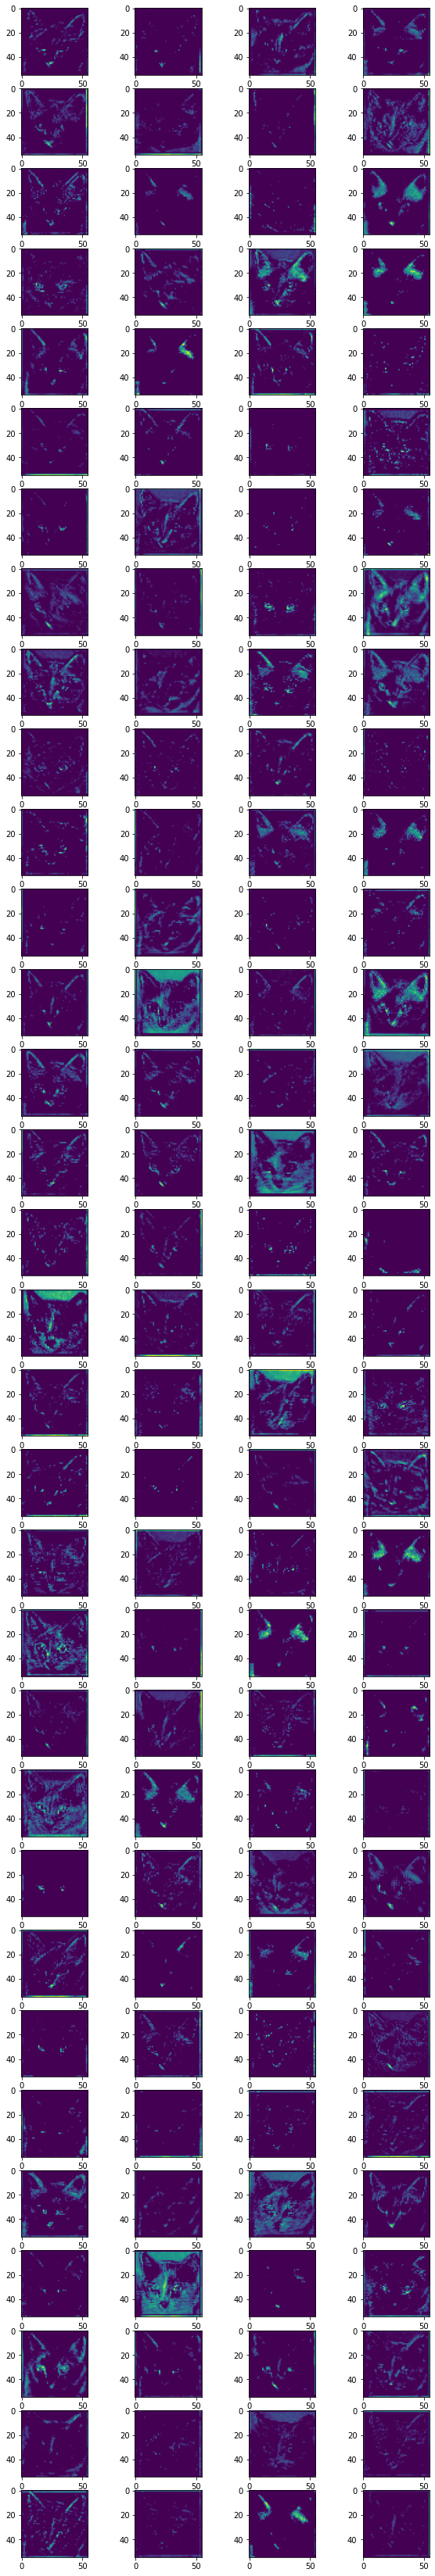

In [73]:
layer_out = activations[4]

fig = plt.figure(figsize=(10,60))

i =0
for i in range(128):
    subplot = fig.add_subplot(32, 4, i+1)
    subplot.imshow(layer_out[0, : , : , i])

# RNN


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np

In [3]:
tf.enable_eager_execution()

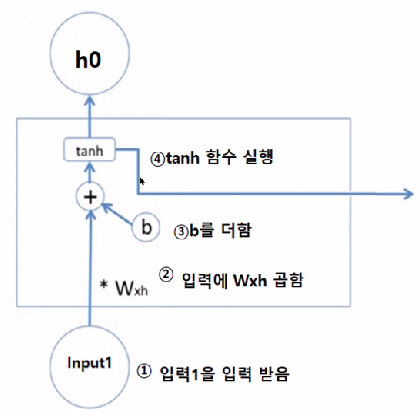

In [6]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [8]:
X = np.array([h, e, l, l], dtype = np.float32)
X

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [12]:
Wxh = tf.Variable([
                   [1],
                   [2],
                   [3],
                   [4]
], dtype = np.float32)

# bias
b = tf.Variable([5], dtype = np.float32)

# 첫번째 예측
# X[0]에 Wxh 곱하고(tf.matul(X[0], Wxh))  b더함
h0 = tf.matmul(X[0:1], Wxh) + b

h0 = tf.tanh(h0)
h0

<tf.Tensor: id=73, shape=(1, 1), dtype=float32, numpy=array([[0.9999876]], dtype=float32)>

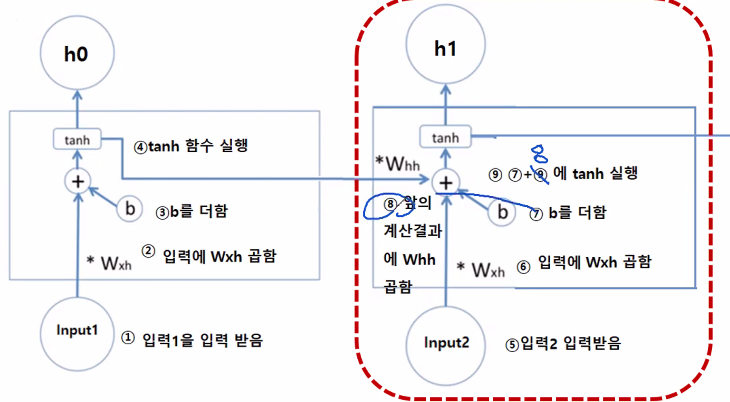

In [20]:
Whh = tf.Variable([[.1]],dtype = np.float32)

h1 = tf.matmul(X[1:2], Wxh) + b


h1 = tf.tanh(tf.matmul(h0, Whh) + h1)


<tf.Tensor: id=139, shape=(1, 1), dtype=float32, numpy=array([[0.9999986]], dtype=float32)>

# 실습

# CNN 필터 시각화

- 603~637

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from keras import models
import matplotlib.pyplot as plt

In [2]:
model_path = '/content/drive/MyDrive/cats_and_dogs_small_cnn.h5'
img_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [3]:
model = load_model(model_path)

In [5]:
# 이미지 로드
img = image.load_img(img_path, target_size=(220,220))

# 3차원으로 변환
img_tensor = image.img_to_array(img)
print(img_tensor.shape)

# 4차원으로 변환
img_tensor = np.expand_dims(img_tensor, axis =0)
print(img_tensor.shape)

# 범위 수정
img_tensor = img_tensor/255

# 예측
model.predict(img_tensor)

(220, 220, 3)
(1, 220, 220, 3)


array([[0.30759504]], dtype=float32)

필터 시각화


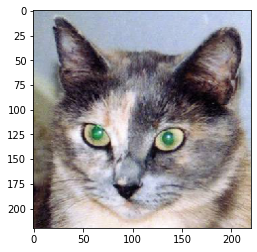

In [7]:
plt.imshow(img_tensor[0])

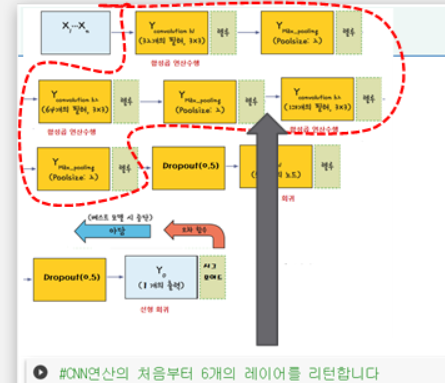

In [13]:
layer_outputs = [layer.output for layer in model.layers[:6]]
layer_outputs

[<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 55, 55, 128) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'max_pooling2d_2')>]

In [14]:
model.input

<KerasTensor: shape=(None, 220, 220, 3) dtype=float32 (created by layer 'conv2d_input')>

In [16]:
activation_model = models.Model(
    # 이미지를 필터 연산가능하게 준비
    inputs = model.input,

    # 필터
    outputs = layer_outputs
)
activation_model

In [17]:
activations = activation_model.predict(img_tensor)

In [37]:
activation_model

In [18]:
# 각 단계별 연산 결과 확인
for i in range(len(activations)):
  print("모델 layer 계산 {}층 , {} :".format(i ,layer_outputs))
  print("img_tensor 연산 결과 :")
  print("activations[{}].shape ={} ".format(i, activations[i].shape))
  print("="*100)

모델 layer 계산 0층 , [<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 55, 55, 128) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'max_pooling2d_2')>] :
img_tensor 연산 결과 :
activations[0].shape =(1, 220, 220, 32) 
모델 layer 계산 1층 , [<KerasTensor: shape=(None, 220, 220, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 110, 110, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTenso

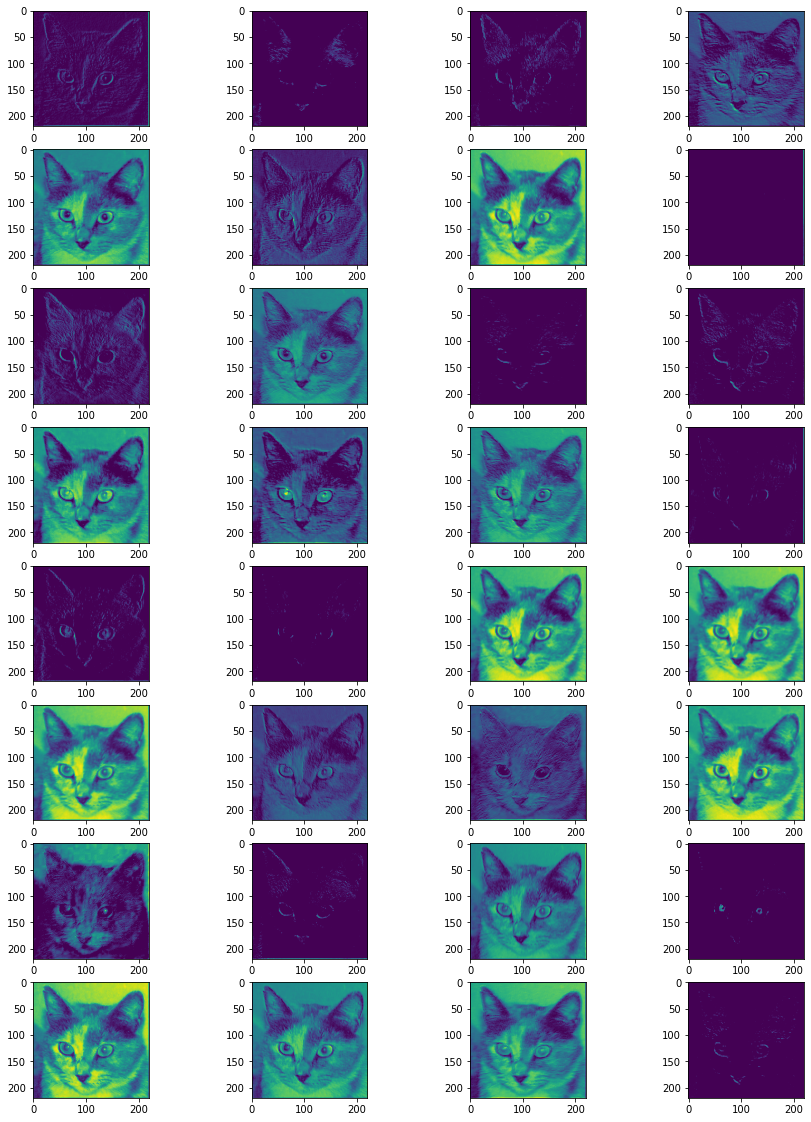

In [20]:
# 첫번쨰 필터 시각화
layer_out = activations[0]
layer_out.shape

fig = plt.figure(figsize = (15, 20))

# 첫번째 연산 필터 결과
i = 0
for i in range(32):
  subplot = fig.add_subplot(8, 4, i+1)
  subplot = plt.imshow(layer_out[0, :, :, i])

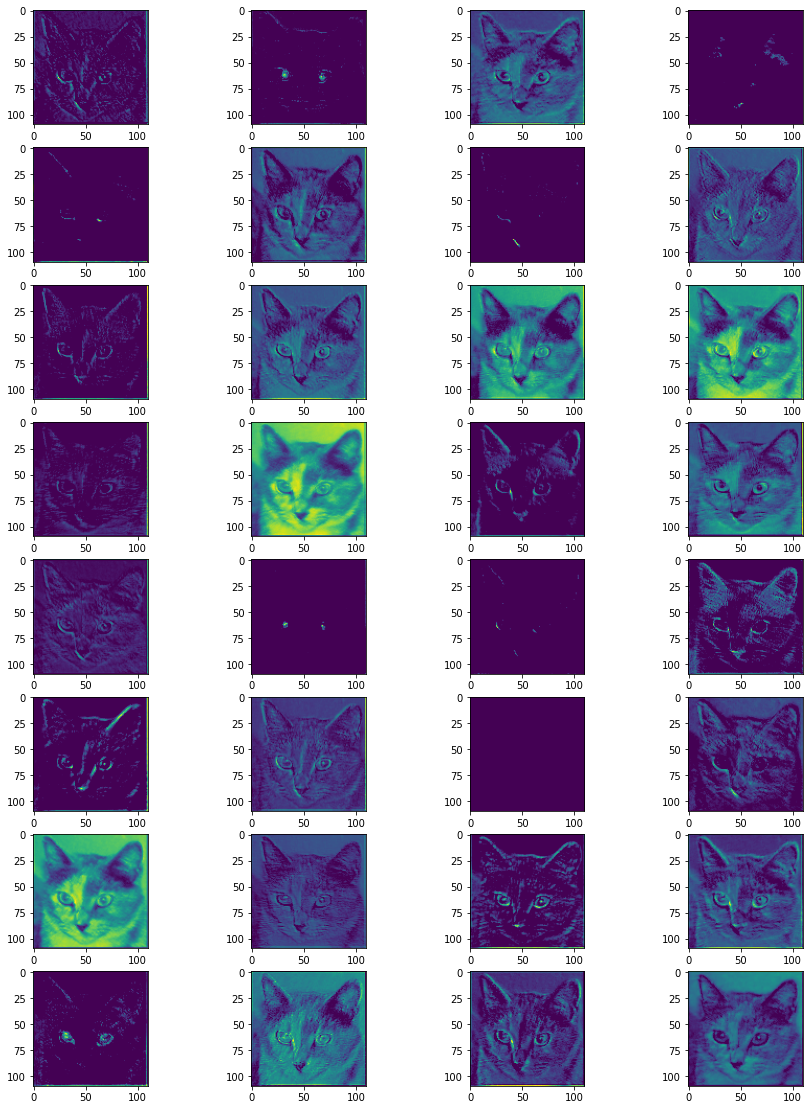

In [22]:
# 두번쨰 필터 시각화
layer_out = activations[2]
layer_out.shape

fig = plt.figure(figsize = (15, 40))

# 첫번째 연산 필터 결과
i = 0
for i in range(32):
  subplot = fig.add_subplot(16, 4, i+1)
  subplot = plt.imshow(layer_out[0, :, :, i])

In [33]:
activations[5].shape

(1, 28, 28, 128)

# RNN 이용한 자동완성

- RNN 47 ~61

In [21]:
%tensorflow_version 1.x

In [22]:
import tensorflow as tf
import numpy as np

In [24]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

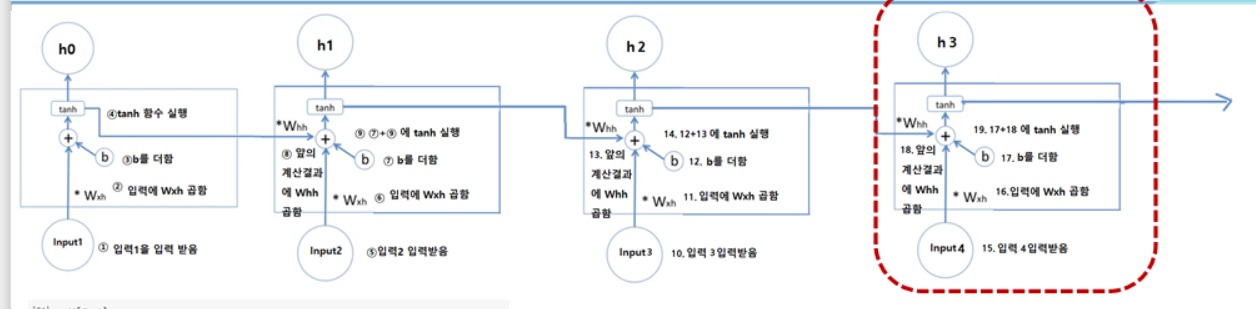

In [25]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [26]:
X = np.array([h, e, l, l], dtype = np.float32)

In [28]:
Wxh = tf.Variable([
                   [1],
                   [2],
                   [3],
                   [4]
], dtype = np.float32)

# bias
b = tf.Variable([5], dtype = np.float32)

Whh = tf.Variable([[.1]], dtype = np.float32)

# 첫번째 예측
# X[0]에 Wxh 곱하고(tf.matul(X[0], Wxh))  b더함
h0 = tf.matmul(X[0:1], Wxh) + b

h0 = tf.tanh(h0)
h0

<tf.Tensor: id=166, shape=(1, 1), dtype=float32, numpy=array([[0.9999876]], dtype=float32)>

In [29]:
h1 = tf.matmul(X[1:2], Wxh) + b

# h1에 h0 * Whh를 더함
h1 = h1 * tf.matmul(h0,Whh)

# tanh 활성함수
h1 = tf.tanh(h1)


In [30]:
h2 = tf.matmul(X[2 :3],Wxh) +b

# h2에 h1 * Whh 더함
h2 = h2 + tf.matmul(h1, Whh)

# 활성함수
h2 = tf.tanh(h2)

In [31]:
h3 = tf.matmul(X[3 :4],Wxh) +b

# h2에 h1 * Whh 더함
h3 = h3 + tf.matmul(h2, Whh)

# 활성함수
h3 = tf.tanh(h3)

In [32]:
# 출력 결과가 4칸이므로 h3을 4번 선형 회귀하기위해서 곱하는 w
w0 = tf.Variable([
                  [0.1, 0.2, 0.3, 0.4]
], dtype =np.float32)

# 출력 결과가 4칸 -> 4번 선형 회귀에 필요한 bias
b0 = tf.Variable([0.5, 0.6, 0.7, 0.8], dtype = np.float32)

In [33]:
# 예측할 값
y = np.array(
    [
     [0, 0, 0, 1]
    ]
    ,dtype = np.float32
)

In [34]:
# 예측값
hypothesis = tf.nn.softmax(tf.matmul(h3, w0) +b0)

# 오차
cost = -tf.reduce_mean(y * tf.log(hypothesis)/len(hypothesis))
print(cost)

tf.Tensor(0.27778855, shape=(), dtype=float32)


In [35]:
optimizer = tf.train.AdamOptimizer(0.01)

In [36]:
for i in range(1000):
  print("=" * 100)
  print("i =", i)
  with tf.GradientTape() as tape:
    h0 = tf.matmul(X[0:1], Wxh) + b

    h1 = tf.matmul(X[1:2], Wxh) +b
    h1 = h1 + tf.matmul(h0, Whh)
    h1 = tf.tanh(h1)

    h2 = tf.matmul(X[2:3], Wxh) + b
    h2 = h2 + tf.matmul(h1, Whh)
    h2 = tf.tanh(h2)

    h3 = tf.matmul(X[3:4], Wxh) + b
    h3 = h3 + tf.matmul(h2, Whh)
    h3 = tf.tanh(h3)

    hypothesis = tf.nn.softmax(tf.matmul(h3, w0) +b0)

    # cost
    cost = -tf.reduce_mean(y * tf.log(hypothesis)/len(hypothesis))
    print("cost = ", cost)

    grads = tape.gradient(cost, [Wxh,b,Whh,w0,b0])

    optimizer.apply_gradients(grads_and_vars = zip(grads, [Wxh, b, Whh, w0, b0]))

i = 0
cost =  tf.Tensor(0.27778855, shape=(), dtype=float32)
i = 1
cost =  tf.Tensor(0.27112472, shape=(), dtype=float32)
i = 2
cost =  tf.Tensor(0.2645528, shape=(), dtype=float32)
i = 3
cost =  tf.Tensor(0.2580756, shape=(), dtype=float32)
i = 4
cost =  tf.Tensor(0.25169557, shape=(), dtype=float32)
i = 5
cost =  tf.Tensor(0.24541529, shape=(), dtype=float32)
i = 6
cost =  tf.Tensor(0.23923713, shape=(), dtype=float32)
i = 7
cost =  tf.Tensor(0.23316337, shape=(), dtype=float32)
i = 8
cost =  tf.Tensor(0.2271961, shape=(), dtype=float32)
i = 9
cost =  tf.Tensor(0.22133729, shape=(), dtype=float32)
i = 10
cost =  tf.Tensor(0.21558872, shape=(), dtype=float32)
i = 11
cost =  tf.Tensor(0.20995201, shape=(), dtype=float32)
i = 12
cost =  tf.Tensor(0.20442861, shape=(), dtype=float32)
i = 13
cost =  tf.Tensor(0.1990198, shape=(), dtype=float32)
i = 14
cost =  tf.Tensor(0.19372654, shape=(), dtype=float32)
i = 15
cost =  tf.Tensor(0.18854974, shape=(), dtype=float32)
i = 16
cost =  tf.Tens

In [37]:
#
h0 = tf.matmul(X[0:1], Wxh) + b

# tanh 활성함수
h0 = tf.tanh(h0)

#
h1 = tf.matmul(X[1:2], Wxh) + b

# h1에 h0 * Whh를 더함
h1 = h1 * tf.matmul(h0,Whh)

# tanh 활성함수
h1 = tf.tanh(h1)

#
h2 = tf.matmul(X[2 :3],Wxh) +b

# h2에 h1 * Whh 더함
h2 = h2 + tf.matmul(h1, Whh)

# 활성함수
h2 = tf.tanh(h2)

#
h3 = tf.matmul(X[3 :4],Wxh) +b

# h2에 h1 * Whh 더함
h3 = h3 + tf.matmul(h2, Whh)

# 활성함수
h3 = tf.tanh(h3)

hypothesis = tf.nn.softmax(tf.matmul(h3, w0) + b0)

In [41]:
hypothesis.numpy()

array([[9.7657111e-04, 1.1927863e-03, 1.4568715e-03, 9.9637371e-01]],
      dtype=float32)